In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
df = pd.read_csv('base_model_data.csv')
df.head()

,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city,eopen,tenure,recency
0,0,2012-09-28,2013-11-08,2013-11-08,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL,29.0,406,1849
1,1,2010-12-19,2011-01-04,2014-01-19,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL,88.0,1127,1777
2,0,2010-10-22,2011-03-28,2011-03-28,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM,0.0,157,2805
3,1,2010-11-27,2010-11-29,2013-01-28,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM,27.0,793,2133
4,1,2008-11-17,2010-12-10,2014-01-14,46,80.434783,15.217391,175.10,0.141176,1,1,0,Wednesday,DEL,37.0,1884,1782


In [3]:
df['created'] = df['created'].apply(lambda x: pd.to_datetime(str(x)))
df['firstorder'] = df['firstorder'].apply(lambda x: pd.to_datetime(str(x)))
df['lastorder'] = df['lastorder'].apply(lambda x: pd.to_datetime(str(x)))

In [4]:
df.dtypes

retained               int64
created       datetime64[ns]
firstorder    datetime64[ns]
lastorder     datetime64[ns]
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
eopen                float64
tenure                 int64
recency                int64
dtype: object

In [5]:
df1=df.copy()

# Statistical tests

In [6]:
from scipy.stats import ttest_ind,chisquare,chi2_contingency,shapiro,mannwhitneyu,wilcoxon
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.stats.proportion import proportions_ztest

In [7]:
#esent
samp1 = df1[df1['retained']==0]['esent']
samp2 = df1[df1['retained']==1]['esent']
ttest_ind(samp1,samp2)

Ttest_indResult(statistic=-157.1907351729261, pvalue=0.0)

In [8]:
#eopenrate
samp1 = df1[df1['retained']==0]['eopenrate']
samp2 = df1[df1['retained']==1]['eopenrate']
ttest_ind(samp1,samp2)

Ttest_indResult(statistic=-9.981674022312102, pvalue=2.0253735862715588e-23)

In [9]:
#eclickrate
samp1 = df1[df1['retained']==0]['eclickrate']
samp2 = df1[df1['retained']==1]['eclickrate']
ttest_ind(samp1,samp2)

Ttest_indResult(statistic=-7.052665816673395, pvalue=1.8002408389041709e-12)

In [10]:
cat_cols = ['paperless','refill','doorstep','favday','city']
num_cols = ['esent','eopen','eopenrate','eclickrate','avgorder','ordfreq','tenure','recency']

In [11]:
# Shapiro test for numerical test
H0 = 'Data is normal'
Ha = "Data is not normal"
normal = []
for cols in num_cols:
    pval = shapiro(df[cols])[1]
    print(cols,':',pval)
    if pval < 0.05:
        print(Ha,'\n')
    else:
        print(Ho,'\n')
        normal.append(cols)

esent : 0.0
Data is not normal 

eopen : 0.0
Data is not normal 

eopenrate : 0.0
Data is not normal 

eclickrate : 0.0
Data is not normal 

avgorder : 0.0
Data is not normal 

ordfreq : 0.0
Data is not normal 

tenure : 0.0
Data is not normal 

recency : 0.0
Data is not normal 



### Since data is not normal we are going to use mannwhitneyu statistical test 

In [12]:
#Ho:Independent feature doesnot have any effect on target variable
#Ha:Independent feature has some effect on target variable

significant_var=[]
for cols in num_cols:
    samp1 = df1[df1['retained']==0][cols]
    samp2 = df1[df1['retained']==1][cols]
    print(cols)    
    stat,pval = mannwhitneyu(samp1,samp2)
    Ho = f'"{cols}" doesnot have any effect on target variable "Retained"'
    Ha = f'"{cols}" has some effect on target variable "Retained"'
    
    if pval < 0.05:
        print(f'p-val = {pval}')
        print(Ha,'\n')
        significant_var.append(cols)
    else:
        print(Ho,'\n')

esent
p-val = 0.0
"esent" has some effect on target variable "Retained" 

eopen
p-val = 0.0
"eopen" has some effect on target variable "Retained" 

eopenrate
p-val = 2.3859610254464484e-248
"eopenrate" has some effect on target variable "Retained" 

eclickrate
p-val = 0.0
"eclickrate" has some effect on target variable "Retained" 

avgorder
"avgorder" doesnot have any effect on target variable "Retained" 

ordfreq
p-val = 2.7892428883179996e-07
"ordfreq" has some effect on target variable "Retained" 

tenure
"tenure" doesnot have any effect on target variable "Retained" 

recency
p-val = 5.237695566591219e-204
"recency" has some effect on target variable "Retained" 



In [13]:
significant_var

['esent', 'eopen', 'eopenrate', 'eclickrate', 'ordfreq', 'recency']

In [14]:
samp = pd.crosstab(df1['paperless'],df1['retained'])
samp

retained,0,1
paperless,,
0,2581,5913
1,2527,14344


In [15]:
samp.sum(axis=1)

paperless
0     8494
1    16871
dtype: int64

In [16]:
# retained =1 if customer is retained
# retained =0 if customer is not retained
#Ho:proportion(CustomerChurned 0 who didnot choose paperless communication 0) = proportion(CustomerChurned 0 who choose paperless communication 1)
#Ha:proportion(CustomerChurned 0 who didnot choose paperless communication 0) != proportion(CustomerChurned 0 who choose paperless communication 1)

proportions_ztest([samp[0][0],samp[0][1]],list(samp.sum(axis=1)))

(28.878279001204877, 2.2378070185611648e-183)

In [17]:
proportions_ztest([samp[1][0],samp[1][1]],list(samp.sum(axis=1)))

(-28.878279001204888, 2.237807018560528e-183)

In [18]:
for cols in cat_cols:
    print(cols)
    print(len(df1[cols].unique()))
    print('\n')

paperless
2


refill
2


doorstep
2


favday
7


city
4




In [19]:
sig_cat_cols = []
for cols in cat_cols:
    print('Column Name:',cols)
    print('\n')
    samp = pd.crosstab(df1[cols],df1['retained'])
    print(samp)
    print('\n')
    len_unique = len(df1[cols].unique())
    if len_unique==2:
        stat,pval = proportions_ztest([samp[0][0],samp[0][1]],list(samp.sum(axis=1)))
    else:
        pval = chi2_contingency(pd.crosstab(df1['retained'],df1[cols]))[1]
    Ho = f'"{cols}" doesnot have any effect on target variable "Retained"'
    Ha = f'"{cols}" has some effect on target variable "Retained"'
    if pval < 0.05:
        print(f'p-val = {pval}')
        print(Ha,'\n')
        sig_cat_cols.append(cols)
    else:
        print(Ho,'\n')

Column Name: paperless


retained      0      1
paperless             
0          2581   5913
1          2527  14344


p-val = 2.2378070185611648e-183
"paperless" has some effect on target variable "Retained" 

Column Name: refill


retained     0      1
refill               
0         4924  17939
1          184   2318


p-val = 2.657417128645621e-63
"refill" has some effect on target variable "Retained" 

Column Name: doorstep


retained     0      1
doorstep             
0         5045  19363
1           63    894


p-val = 1.5789618377712446e-26
"doorstep" has some effect on target variable "Retained" 

Column Name: favday


retained      0     1
favday               
Friday      880  3623
Monday     1036  4638
Saturday    161   883
Sunday       72   132
Thursday    882  3406
Tuesday    1190  4452
Wednesday   887  3123


p-val = 3.214139452870288e-13
"favday" has some effect on target variable "Retained" 

Column Name: city


retained     0     1
city                
BLR        164 

In [20]:
arr=np.array([[1, 2], [3, 4]])

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif=pd.DataFrame()
vif['Features']=num_cols
vif['VIF_values'] = [variance_inflation_factor(df1[num_cols].values,i) for i in range(df1[num_cols].shape[1])]
vif.sort_values('VIF_values',ascending=False)

,Features,VIF_values
2,eopenrate,4.653139
1,eopen,4.252824
0,esent,4.146555
7,recency,3.709717
4,avgorder,3.433494
3,eclickrate,1.876380
6,tenure,1.497418
5,ordfreq,1.113095


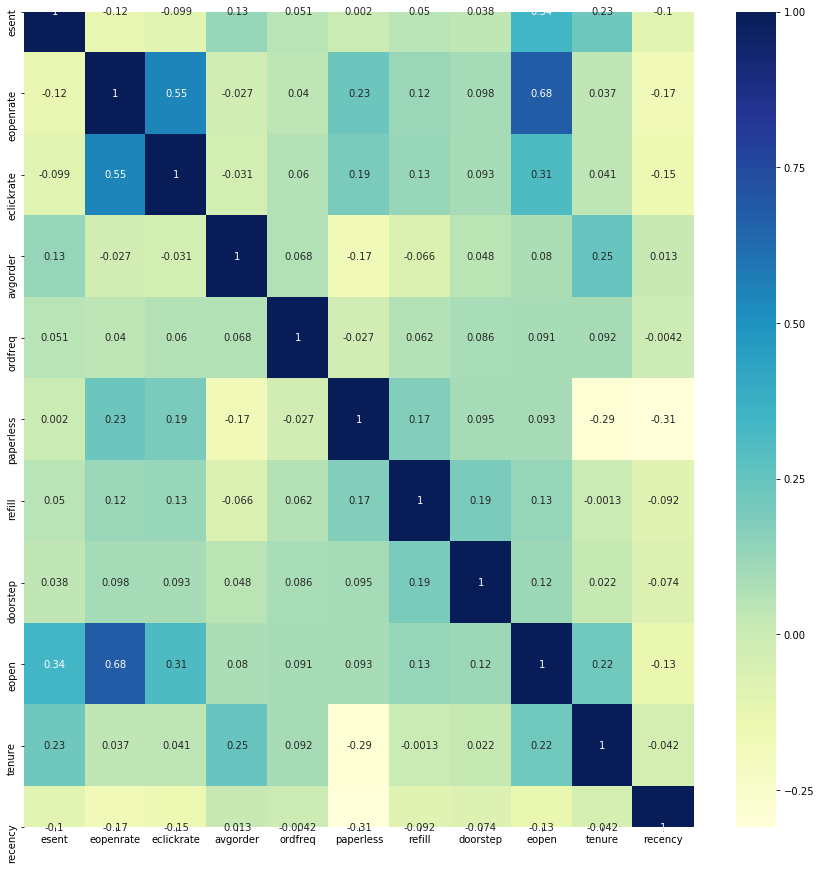

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.drop('retained',axis=1).corr(),annot=True,cmap="YlGnBu")

In [23]:
df1['retained'].value_counts()/len(df)*100

1    79.862015
0    20.137985
Name: retained, dtype: float64